## Linear Regression
### Theories
- Input data matrix $\mathbf{X} \in \mathbb{R}^{n \times (d+1)}$, each row $\mathbf{x}_{\vec{i}} = [1, x_1, x_2, ..., x_d], 1 \leq i \leq n$ is an observation with $1$ prepending it. Input label for training $[y_1, y_2, ..., y_n]^T = \mathbf{y} \in \mathbb{R}^{n \times 1}$, each $y_i$ is associated with each observation.
- Find weights $[w_0, w_1, ..., w_d] = \mathbf{w} \in \mathbb{R}^{(d+1) \times 1}$ - a column vector, such that when we multiply each observation with it, $\mathbf{x}_{\vec{i}}\mathbf{w}$, we get an approximation $\hat{y}_i$ of the given label $y_i$: $\hat{y}_i = \mathbf{x}_{\vec{i}}\mathbf{w} \approx y_i$.
- The prediction error, or loss function is given by squared of the difference between prediction and given label: $$ \begin{aligned}
  L(\mathbf{w})
    &= \frac{1}{2}\sum_{i=1}^{n}(y_i-\mathbf{x}_{\vec{i}}\mathbf{w})^2\\
    &= \frac{1}{2}\| \mathbf{y} - \mathbf{X}\mathbf{w} \|_2^2
\end{aligned} $$
- Minimization problem: $$
  \mathbf{w}^{*} = \underset{\mathbf{w}}{\text{argmin}}\ L(\mathbf{w})
$$
- Equate partial derivative of loss function $L$ w.r.t. $\mathbf{w}$ gives: $$\begin{cases}
  \frac{\partial L}{\partial \mathbf{w}} &= \mathbf{X}^T(\mathbf{X}\mathbf{w}-\mathbf{y})\\
  \frac{\partial L}{\partial \mathbf{w}} &= 0
\end{cases},\ \ \ \ \Rightarrow \mathbf{X}^T\mathbf{X}\mathbf{w} = \mathbf{X}^T\mathbf{y}$$
- Solution is exactly the least-square problem: $$
  \mathbf{w} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^Ty
$$

### Demo

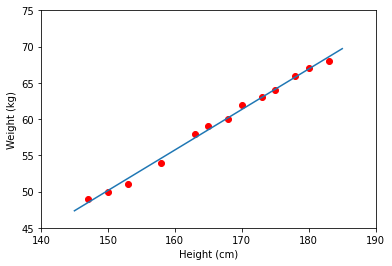

In [1]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import matplotlib.pyplot as plt

from regression.LinearRegression import LinearRegression

# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T

# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T

lr = LinearRegression(X, y)
w = lr.fit()

# Plot fitted line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1*x0

plt.plot(X.T, y.T, 'ro')       # data
plt.plot(x0, y0)               # fitted line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

## GD algorithms
- We know that given scalar-field function $f(\mathbf{x})$, the gradient $\nabla f$ points to the direction (in the input space) the direction of steepest ascent for the scalar field. Therefore, we move input $\mathbf{x}$ in the opposite direction, using some proportion of the gradient.
- In practice, the minimization target is often the loss function $L$, input is often the weights $\mathbf{w}$. We have gradient descent update, using preset number $\eta > 0 \in \mathbb{R}$, often called the learning rate. At iteration $(t+1)$: $$
  \mathbf{w}_i^{(t+1)} = \mathbf{w}_i^{(t)} - \eta \nabla{f}
$$

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def plot_line(w):
    x0 = np.linspace(0, 1, 2, endpoint=True)
    w0 = w[0][0]
    w1 = w[1][0]

    y0 = w0 + w1*x0
    plt.plot(x0, y0)

### a. GD

GD results:
w= [[3.93772401]
 [3.20701062]] 
iter= 60


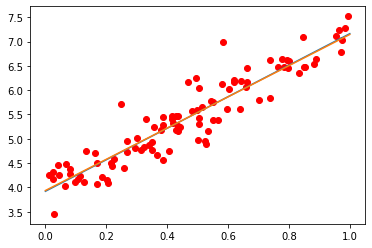

In [3]:
from regression.LinearRegression import LinearRegression

np.random.seed(2)

X = np.random.rand(100, 1)
y = 4 + 3*X + .3*np.random.randn(100, 1)
plt.plot(X.T, y.T, 'ro')

# linear regression line
lr = LinearRegression(X, y)
w = lr.fit()
plot_line(w)

# gd-optimized
w_init = np.array([[2], [1]])
(w, i) = lr.gd(w_init, 1)
print('GD results:\nw=', w[-1], '\niter=', i+1)
plot_line(w[-1])

plt.show()

### b. GD Momentum
- If we model the gradient descending itself as the physical "sliding downhill", we can apply momentum to the descent.
- When an object slides downhill, the "previous moment" velocity $v^{(t-1)}$  affects the current velocity $v^{(t)}$. We can simulate this by applying a portion $\gamma$ of it: $$\begin{cases}
  v^{(t)} = \gamma v^{(t-1)} + \eta \nabla{f}\\
  \mathbf{w}_i^{(t+1)} = \mathbf{w}_i^{(t)} - v^{(t)}
\end{cases}$$

GDM results:
w= [[3.93920119]
 [3.20513618]] 
iter= 26


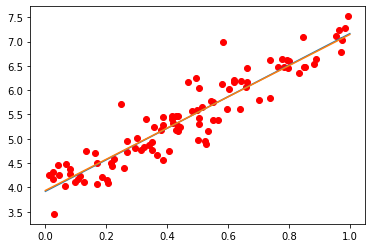

In [4]:
from regression.LinearRegression import LinearRegression

np.random.seed(2)

X = np.random.rand(100, 1)
y = 4 + 3*X + .3*np.random.randn(100, 1)
plt.plot(X.T, y.T, 'ro')

# linear regression line
lr = LinearRegression(X, y)
w = lr.fit()
plot_line(w)

# gd-optimized
w_init = np.array([[2], [1]])
(w, i) = lr.gdm(w_init, 1, 0.5)
print('GDM results:\nw=', w[-1], '\niter=', i+1)
plot_line(w[-1])

plt.show()

### c. Stochastic GD
- With each gradient descent step, we're calculating the gradient for all dimensions of $\mathbf{w}$. This is impractical sometimes: as number of observations in the dataset grows large, the gradient computing costs increases linearly.
- In practice we can apply gradient descent technique with a small subset at a time (sometimes with individual observation), i.e. treat the entire input dataset as a few observations (or a single observation) to "descent" $\mathbf{w}$. Denote $L_i(\mathbf{w})$ as the loss function using only observation $\mathbf{x}_{\vec{i}}$ and label $y_i$: $$
  \mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \eta \nabla L_i(\mathbf{w})
$$
- For linear regression: $$\begin{cases}
  L_i(\mathbf{w}) &= \frac{1}{2}(\mathbf{x}_{\vec{i}}\mathbf{w}-y_i)^2\\
  \nabla L_i(\mathbf{w}) &= \frac{\partial L_i}{\partial \mathbf{w}} = (\mathbf{x}_{\vec{i}}\mathbf{w}-y_i)\mathbf{x}_{\vec{i}}^T
\end{cases}$$

SGD results:
w= [[3.86109218]
 [3.19276092]]


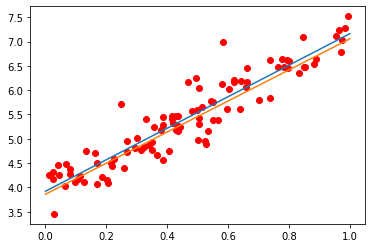

In [2]:
from regression.LinearRegression import LinearRegression

np.random.seed(2)

X = np.random.rand(100, 1)
y = 4 + 3*X + .3*np.random.randn(100, 1)
plt.plot(X.T, y.T, 'ro')

# linear regression line
lr = LinearRegression(X, y)
w = lr.fit()
plot_line(w)

# gd-optimized
w_init = np.array([[2], [1]])
w = lr.sgd(w_init, 1)
print('SGD results:\nw=', w[-1])
plot_line(w[-1])

plt.show()